In [1]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import matplotlib.pyplot as plt
# import statsmodels.api as sm



# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

import os

# transform
import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
import seaborn as sns

# working with dates
from datetime import datetime

# modeling
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing

# evaluate
from sklearn.metrics import mean_squared_error
from math import sqrt 


Exercises

The end result of this exercise should be a Jupyter notebook named model.

Using saas.csv or log data from API usage

1. Split data (train/test) and resample by any period, except daily, and aggregate using the sum.


In [2]:
df = pd.read_csv('saas.csv')

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')

In [4]:
df.month_invoiced = pd.to_datetime(df.month_invoiced)

In [5]:
df = df.set_index('month_invoiced').sort_index()

In [6]:
df.drop(['customer_id', 'invoice_id', 'subscription_type'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 790458 entries, 2014-01-31 to 2017-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   amount  790458 non-null  float64
dtypes: float64(1)
memory usage: 12.1 MB


In [8]:
day_df = df.resample('d').sum()
week_df = df.resample('w').sum()
month_df = df.resample('m').sum()

In [44]:
month_df

,amount
month_invoiced,
2014-01-31,35850.0
2014-02-28,37190.0
2014-03-31,38295.0
2014-04-30,39255.0
2014-05-31,40355.0
2014-06-30,41255.0
2014-07-31,42170.0
2014-08-31,43210.0
2014-09-30,44075.0


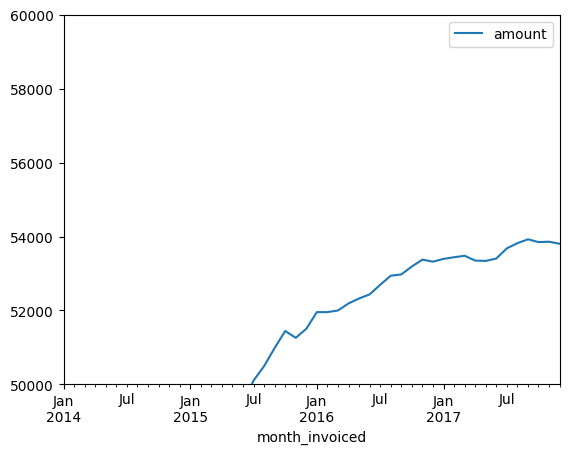

In [47]:
month_df.plot()
plt.ylim(50000, 60000)
#plt.xlim(df.amount.min(), df.amount.max())
plt.show()

In [10]:
train = df['2015-01-01':'2015-12-31']
val = df['2016-01-01':'2016-12-31']
test = df['2017-01-01':'2017-12-31']

In [11]:
#confirm size of train and test = to the original df
len(df), len(train) + len(val) + len(test)

(790458, 562916)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204352 entries, 2015-01-31 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   amount  204352 non-null  float64
dtypes: float64(1)
memory usage: 3.1 MB


In [13]:
train.head()

,amount
month_invoiced,
2015-01-31,0.0
2015-01-31,10.0
2015-01-31,0.0
2015-01-31,5.0
2015-01-31,10.0


In [14]:
month_train = train.resample('m').amount.sum()
month_val = val.resample('m').amount.sum()
month_test = test.resample('m').amount.sum()


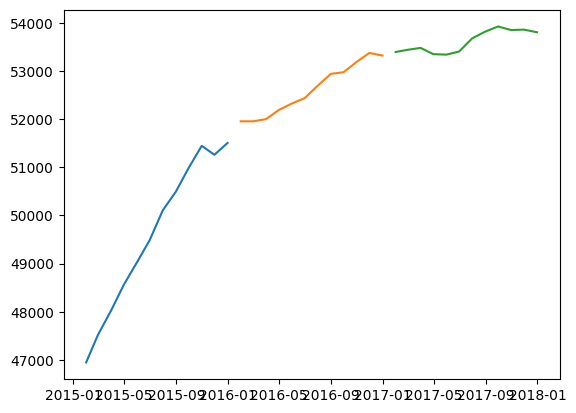

In [15]:
plt.plot(month_train)
plt.plot(month_val)
plt.plot(month_test)
plt.show()

2. Forecast, plot and evaluate using each at least 4 of the methods we discussed:


In [16]:
month_train.head()

month_invoiced
2015-01-31    46945.0
2015-02-28    47520.0
2015-03-31    48025.0
2015-04-30    48560.0
2015-05-31    49025.0
Freq: M, Name: amount, dtype: float64

* Last Observed Value


In [17]:
yhat_df = pd.DataFrame({'actual': month_val}, index=month_val.index)

In [18]:
yhat_df.head()

,actual
month_invoiced,
2016-01-31,51955.0
2016-02-29,51955.0
2016-03-31,52000.0
2016-04-30,52190.0
2016-05-31,52325.0


In [19]:
# Last Observed Value
lov_forecast = month_train.iloc[-1]
yhat_df['last_value'] = lov_forecast
yhat_df.head()

,actual,last_value
month_invoiced,,
2016-01-31,51955.0,51505.0
2016-02-29,51955.0,51505.0
2016-03-31,52000.0,51505.0
2016-04-30,52190.0,51505.0
2016-05-31,52325.0,51505.0


* Simple Average


In [20]:
# Simple Average
sa_forecast = month_train.mean()
yhat_df['simple_average'] = sa_forecast
yhat_df.head()

,actual,last_value,simple_average
month_invoiced,,,
2016-01-31,51955.0,51505.0,49612.916667
2016-02-29,51955.0,51505.0,49612.916667
2016-03-31,52000.0,51505.0,49612.916667
2016-04-30,52190.0,51505.0,49612.916667
2016-05-31,52325.0,51505.0,49612.916667


* Moving Average


In [21]:
# Moving Average (e.g., 3-month moving average)
window = 6
ma_forecast = month_train.rolling(window=window).mean().iloc[-1]
yhat_df['moving_average'] = ma_forecast
yhat_df.head()

,actual,last_value,simple_average,moving_average
month_invoiced,,,,
2016-01-31,51955.0,51505.0,49612.916667,50965.833333
2016-02-29,51955.0,51505.0,49612.916667,50965.833333
2016-03-31,52000.0,51505.0,49612.916667,50965.833333
2016-04-30,52190.0,51505.0,49612.916667,50965.833333
2016-05-31,52325.0,51505.0,49612.916667,50965.833333


* Holt's Linear Trend


In [22]:
model = Holt(month_train, exponential=False, damped=True)
model = model.fit(optimized=True)
yhat_values = model.predict(start = month_val.index[0],
                            end = month_val.index[-1])
yhat_df['holts_linear'] = round(yhat_values, 2)
yhat_df.head()

,actual,last_value,simple_average,moving_average,holts_linear
month_invoiced,,,,,
2016-01-31,51955.0,51505.0,49612.916667,50965.833333,51835.33
2016-02-29,51955.0,51505.0,49612.916667,50965.833333,52161.82
2016-03-31,52000.0,51505.0,49612.916667,50965.833333,52485.04
2016-04-30,52190.0,51505.0,49612.916667,50965.833333,52805.03
2016-05-31,52325.0,51505.0,49612.916667,50965.833333,53121.82


* Holt's Seasonal Trend


In [23]:
hst_model = ExponentialSmoothing(month_train, seasonal_periods=2, trend='add', seasonal='add').fit()
hst_model.forecast(month_val.shape[0])
yhat_df['holts_season'] = hst_model.forecast(month_val.shape[0])
yhat_df.head()

,actual,last_value,simple_average,moving_average,holts_linear,holts_season
month_invoiced,,,,,,
2016-01-31,51955.0,51505.0,49612.916667,50965.833333,51835.33,51838.713393
2016-02-29,51955.0,51505.0,49612.916667,50965.833333,52161.82,52152.740071
2016-03-31,52000.0,51505.0,49612.916667,50965.833333,52485.04,52427.553745
2016-04-30,52190.0,51505.0,49612.916667,50965.833333,52805.03,52741.580423
2016-05-31,52325.0,51505.0,49612.916667,50965.833333,53121.82,53016.394097


In [24]:
def eval_preds(df, predictions, actual='actual'):
    
    return round(sqrt(mean_squared_error(df[actual], df[predictions])), 2)

In [25]:
for col in yhat_df.columns:
    print(f'For {col}:')
    print(eval_preds(yhat_df, col))

For actual:
0.0
For last_value:
1222.13
For simple_average:
3044.03
For moving_average:
1725.98
For holts_linear:
1116.43
For holts_season:
998.76


In [35]:
cols_toplt = ['last_value', 'simple_average', 'moving_average', 'holts_linear', 'holts_season']

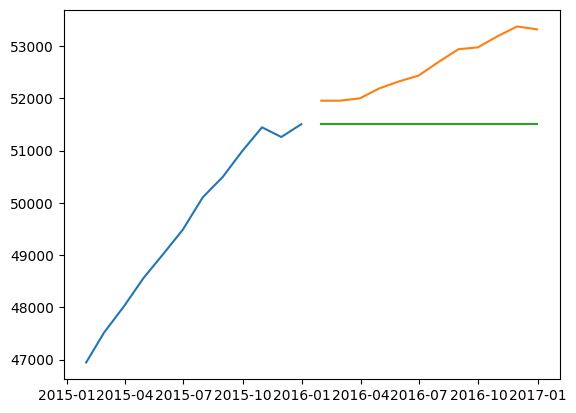

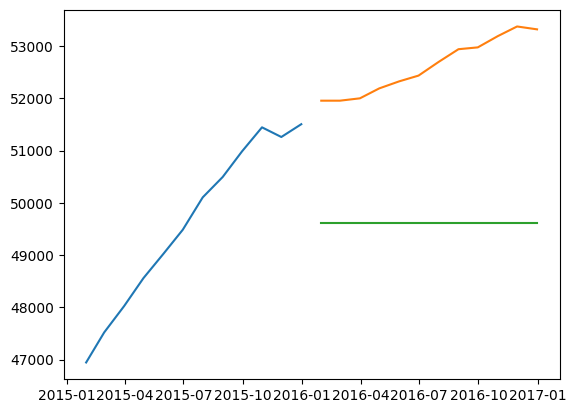

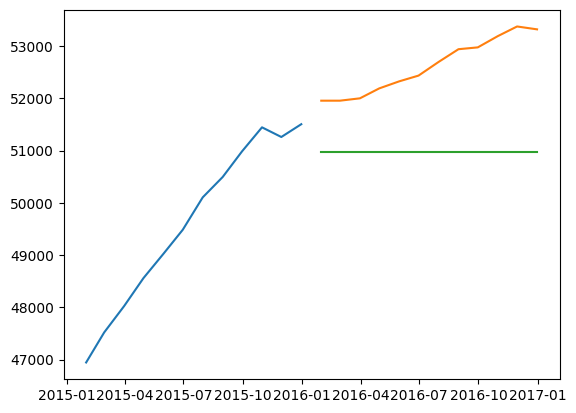

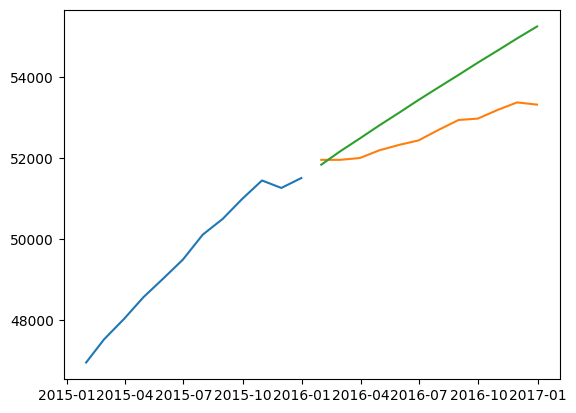

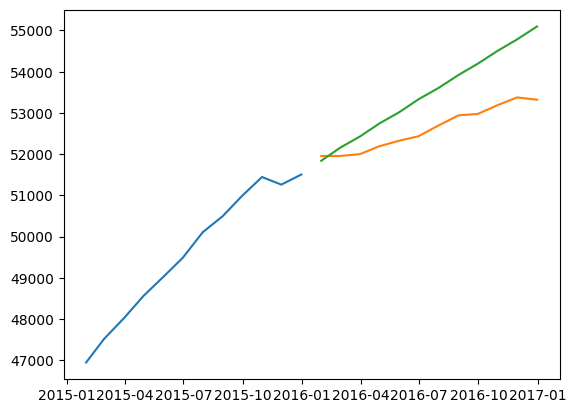

In [38]:
for col in cols_toplt:
    plt.plot(month_train)
    plt.plot(yhat_df['actual'])
    plt.plot(yhat_df[col])
    plt.show()

* Holt's Linear Trend


* Based on previous year/month/etc., this is up to you.


In [ ]:

# Plot actual vs. forecast values for validation set
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['amount'], label='Train')
plt.plot(val.index, val['amount'], label='Validation', color='gray')
plt.plot(yhat_df.index, yhat_df, label=['LOV', 'SA', 'MA', 'Holt', 'Holt-Winters'])
plt.legend()
plt.title('Actual vs. Forecast (Validation Set)')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

# Evaluate the models
methods = ['LOV', 'SA', 'MA', 'Holt', 'Holt-Winters']
for method in methods:
    val_mae = mean_absolute_error(val['amount'], yhat_df[method+'_Forecast'])
    val_rmse = np.sqrt(mean_squared_error(val['amount'], yhat_df[method+'_Forecast']))
    print(f'{method} Validation MAE: {val_mae:.2f}, Validation RMSE: {val_rmse:.2f}')
